In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 1
!hostname
!pwd

dv001.ib.bridges2.psc.edu
/ocean/projects/asc170022p/mtragoza/mre-pinn/IPMI-2023


In [2]:
import sys, os, pathlib
import numpy as np
import xarray as xr
import torch
import matplotlib.pyplot as plt
import seaborn as sns

os.environ['DDEBACKEND'] = 'pytorch'
import deepxde

sys.path.append('..')
%aimport mre_pinn

torch.cuda.is_available()

Using backend: pytorch



True

In [48]:
%autoreload
example0 = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/fem_box/', 60) # x z
example1 = mre_pinn.data.MREExample.load_xarrays('../data/BIOQIC/phantom/', 60) # x y
example2 = mre_pinn.data.MREExample.load_xarrays('../data/NAFLD/v3/', '0006') # x

Loading ../data/BIOQIC/fem_box/60/wave.nc
Loading ../data/BIOQIC/fem_box/60/mre.nc
Loading ../data/BIOQIC/fem_box/60/mre_mask.nc
Loading ../data/BIOQIC/phantom/60/wave.nc
Loading ../data/BIOQIC/phantom/60/mre.nc
Loading ../data/BIOQIC/phantom/60/mre_mask.nc
Loading ../data/NAFLD/v3/0006/wave.nc
Loading ../data/NAFLD/v3/0006/mre.nc
Loading ../data/NAFLD/v3/0006/mre_mask.nc


In [60]:
%autoreload
example = example2
frequency = 40

<IPython.core.display.Javascript object>


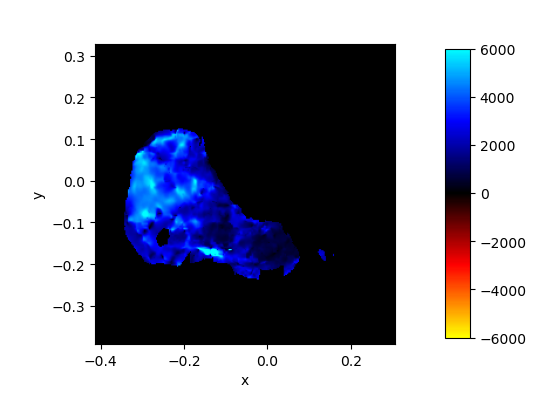

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

In [65]:
%autoreload
example.view('mre', ax_height=3, polar=True, vmax=6e3, mask=1)

Evaluating direct baseline


<IPython.core.display.Javascript object>


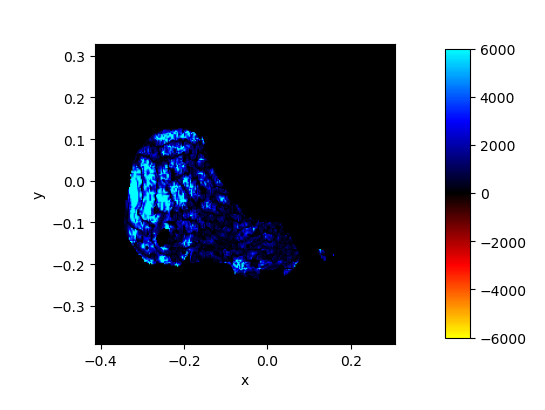

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

In [66]:
mre_pinn.baseline.eval_direct_baseline(example, frequency)
example.view('direct', ax_height=3, polar=True, vmax=6e3, mask=1)

Evaluating FEM baseline
100%|██████████| 4/4 [02:04<00:00, 31.01s/it]


<IPython.core.display.Javascript object>


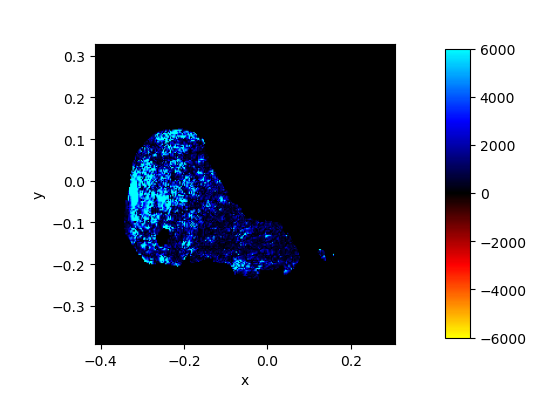

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

Evaluating FEM baseline
100%|██████████| 4/4 [02:34<00:00, 38.70s/it]


<IPython.core.display.Javascript object>


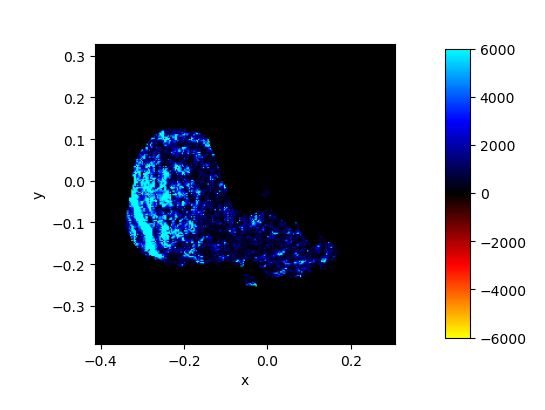

interactive(children=(SelectionSlider(description='part', options=(('abs', 0), ('angle', 1)), value=0), Select…

CPU times: user 14min 3s, sys: 22.7 s, total: 14min 25s
Wall time: 4min 39s


In [68]:
%%time
%autoreload
for hetero in [False, True]:
    mre_pinn.baseline.eval_fem_baseline(
        example,
        frequency,
        u_elem_type='CG-3',
        mu_elem_type='DG-1',
        align_nodes=False,
        mesh_scale=2,
        savgol_filter=True,
        order=2,
        kernel_size=3,
        despeckle=True,
        hetero=hetero
    )
    example.view('fem', ax_height=3, polar=True, vmax=6e3, mask=1)